<a href="https://colab.research.google.com/github/evgeny-kolonsky/Lab4_Nuclear/blob/main/Lab4_Poisson_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare
from scipy.stats import poisson
from scipy.stats import chi2

In [8]:
URL = 'https://raw.githubusercontent.com/tphlabs/data/main/Lab4_Nuclear/2023_12_13/Co60_shelf10_101measurements.tsv'
data = np.genfromtxt(URL, delimiter='\t', skip_header=11, usecols=2)
#QTY = 40
#s = np.random.choice(data, QTY)
s = data
m = len(s)
n = s.mean()
freqs = s / m
print(s.mean(), s.std())

11.128712871287128 3.2841152834187812


In [9]:
BINS = 25
DOF = BINS - 2
def expected(x, m):
  return poisson(n).pmf(x) * m
def observed(i):
  ans = 0
  for counts in s:
    if i == counts:
      ans += 1
  return ans

Ok = np.array([observed(i) for i in range(BINS)])
Ek = np.array([expected(i, m) for i in range(BINS)])

chisquare0 = np.sum((Ok - Ek)**2 / Ek) / DOF
#for i in range(BINS):
#  print(f'{i}, {Ok[i]}, {Ek[i]:.1f}, {(Ok[i] - Ek[i])**2 / Ek[i]:.1f}')

#chi2.pdf(chisquare0 * DOF, DOF)
chisquare0

0.8384218290529237

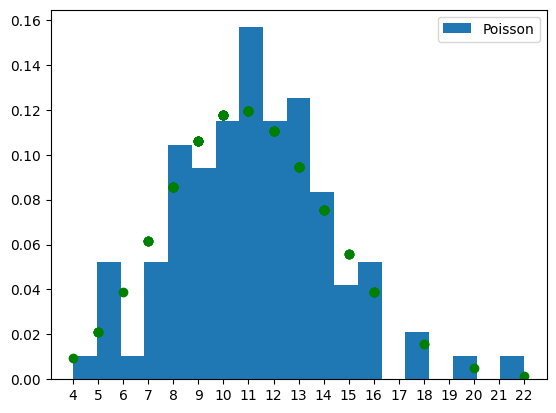

In [10]:
count, bins, ignored = plt.hist(s, 19,  density=True, label='Poisson')
plt.xticks(range(0, int(s.max())+1))
plt.legend()
plt.scatter(s, poisson.pmf(s, n), color='green')
plt.show()

In [11]:
k3 = (s - s.mean())**3
K3 = k3.sum()/(m-1)
s.mean(), s.std(), K3

(11.128712871287128, 3.2841152834187812, 13.081535143613396)

In [12]:
n, err = s.mean(), s.std()/np.sqrt(m)
# relative error in intensity
n, err

(11.128712871287128, 0.3267816843938706)

In [13]:
errK3 = np.sqrt(k3.var() / (m - 1))
K3, errK3

(13.081535143613396, 16.84657074398164)

$$\chi^2$$